In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Load our questionnaire data
data_file_path = "../questionnaire/questionnaire.csv"
df = pd.read_csv(data_file_path)

In [3]:
# Id of participants we want to exclude from the study
exclusion_list = [5, 10, 16, 25, 27, 29]
#exclusion_list = []
# Remove all rows which are of participants who are in the exclusion_list
df = df[~df.ID.isin(exclusion_list)]


In [5]:
diff = df[df["Type"] == "Diff"].copy()
age = diff["Age"].agg(["mean", "std"])
sex = diff.groupby("Sex")
questions_diff = diff.drop(["ID","Type","Age","Sex"], axis=1)
questions_diff = questions_diff.agg(["mean", "std"]).T

print("Age:")
print(age)
print("")
print("F: " + str(sex.get_group("F").shape[0]))
print("M: " + str(sex.get_group("M").shape[0]))

Age:
mean    29.142857
std     11.387288
Name: Age, dtype: float64

F: 2
M: 12


In [7]:
guess = df[df["Type"] == "Guess"].copy()
age = guess["Age"].agg(["mean", "std"])
sex = guess.groupby("Sex")
questions_guess = guess.drop(["ID","Type","Age","Sex"], axis=1)
questions_guess = questions_guess.agg(["mean", "std"]).T


print("Age:")
print(age)
print("")
print("F: " + str(sex.get_group("F").shape[0]))
print("M: " + str(sex.get_group("M").shape[0]))

Age:
mean    31.500000
std     14.631846
Name: Age, dtype: float64

F: 2
M: 10


We want bars for each question asked with the mean value + std

In [10]:
# Plot window presets & color constants
plt.style.use("default")
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'legend.fontsize': 12,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
}
matplotlib.rcParams.update(params)

color_road = "k"
color_diff = "#FFA85C"
color_diff_border = "#E06900"
color_diff_a1 = "#1B998B"
color_guess = "#3F9CDE"
color_guess_a1 = "#1B998B"
color_guess_border = "#1B679D"

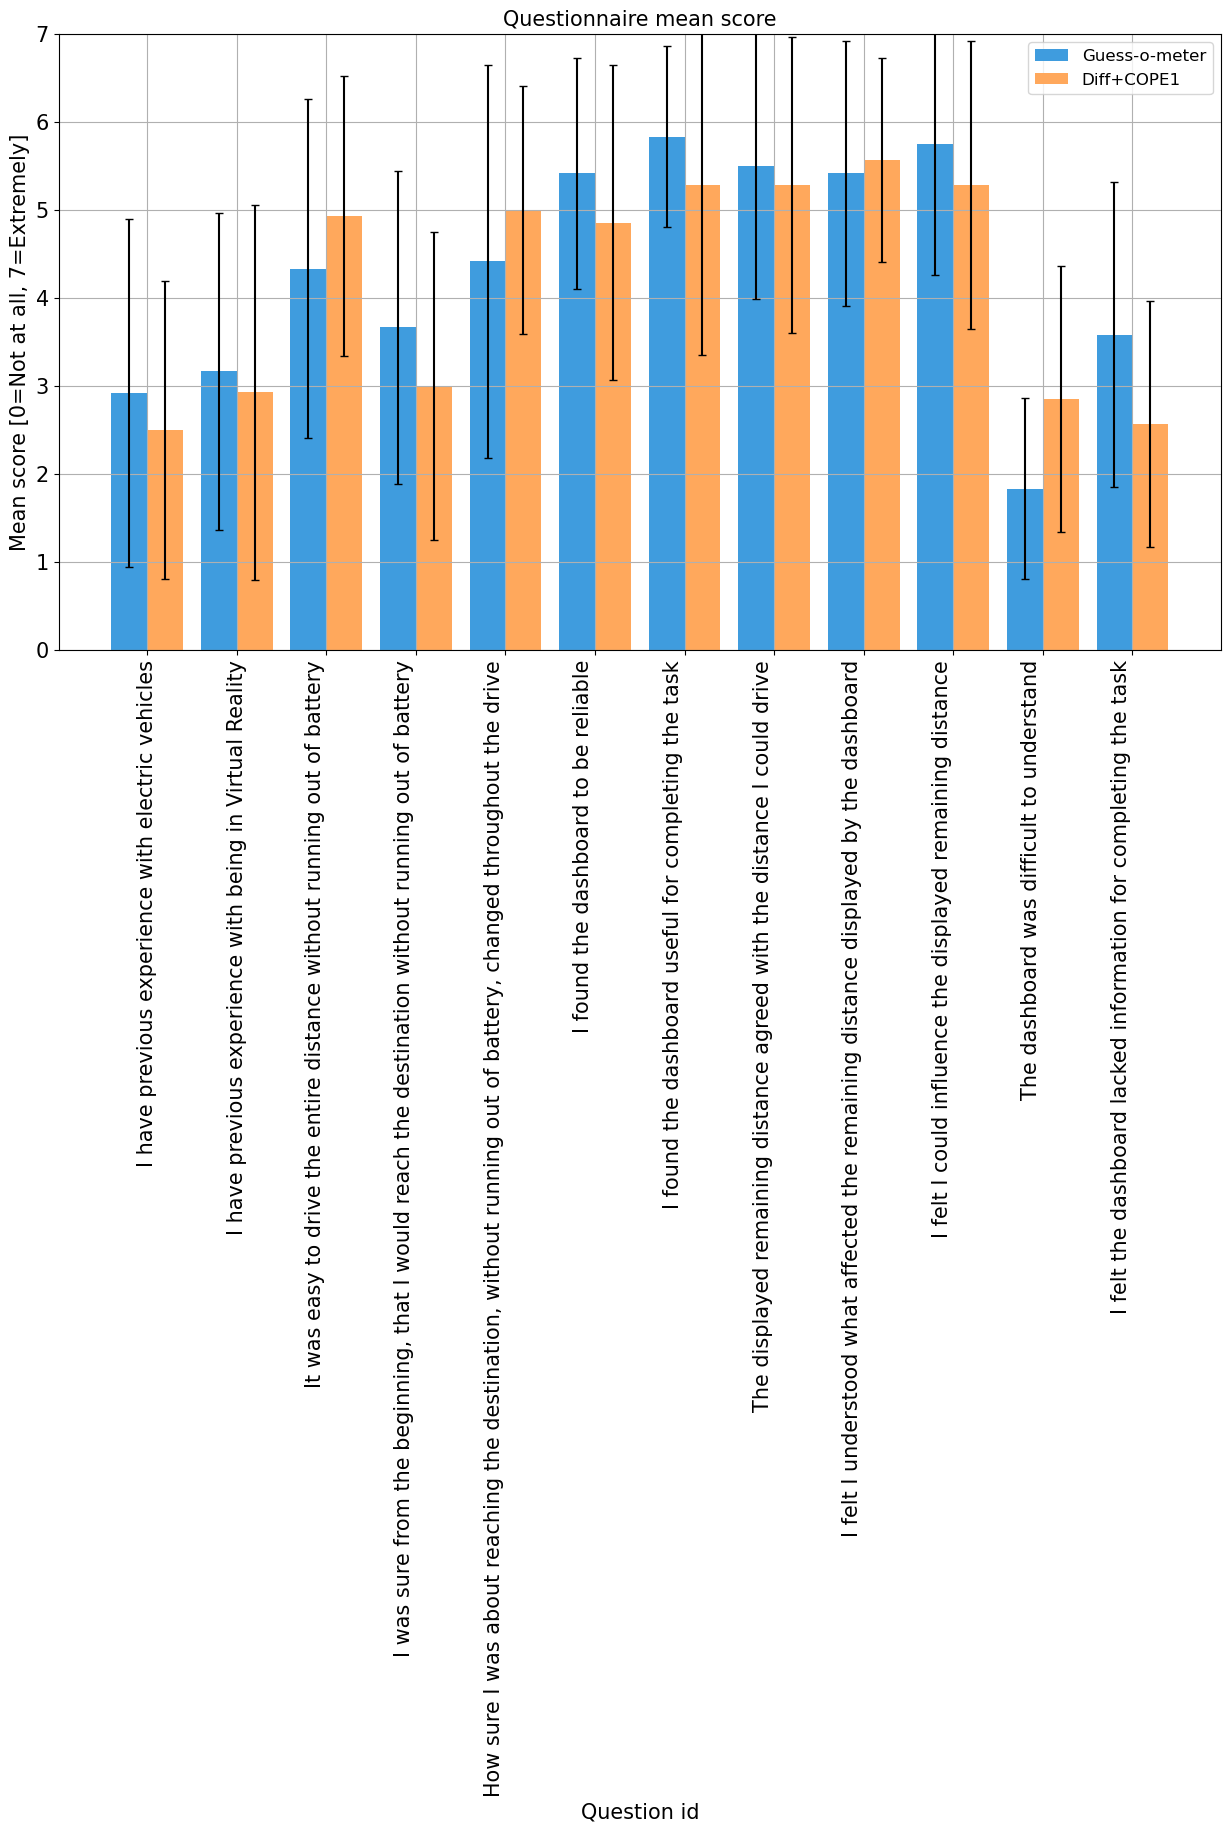

In [13]:
# Plot the data in a bar chart diagram

fig, ax = plt.subplots(figsize=(15,8))

labels = questions_guess.index
guess_mean = questions_guess["mean"].values
guess_std = questions_guess["std"].values

labels = questions_guess.index
diff_mean = questions_diff["mean"].values
diff_std = questions_diff["std"].values

x = np.arange(len(labels))
width = 0.4
capsize = 3

ax.bar(x - width/2, guess_mean, width, yerr=guess_std, capsize=capsize, label="Guess-o-meter", color=color_guess)
ax.bar(x + width/2, diff_mean, width, yerr=diff_std , capsize=capsize, label="Diff+COPE1", color=color_diff)

ax.set_xlabel("Question id")
ax.set_ylabel("Mean score [0=Not at all, 7=Extremely]")
ax.set_title("Questionnaire mean score")

ax.set_ylim(0,7)
ax.grid(True)
ax.legend()
ax.set_xticks(x);
ax.set_xticklabels(labels, rotation=90);

In [14]:
fig.savefig("../figures-local/questionnaire_mean_score.png", dpi=300, bbox_inches = 'tight')

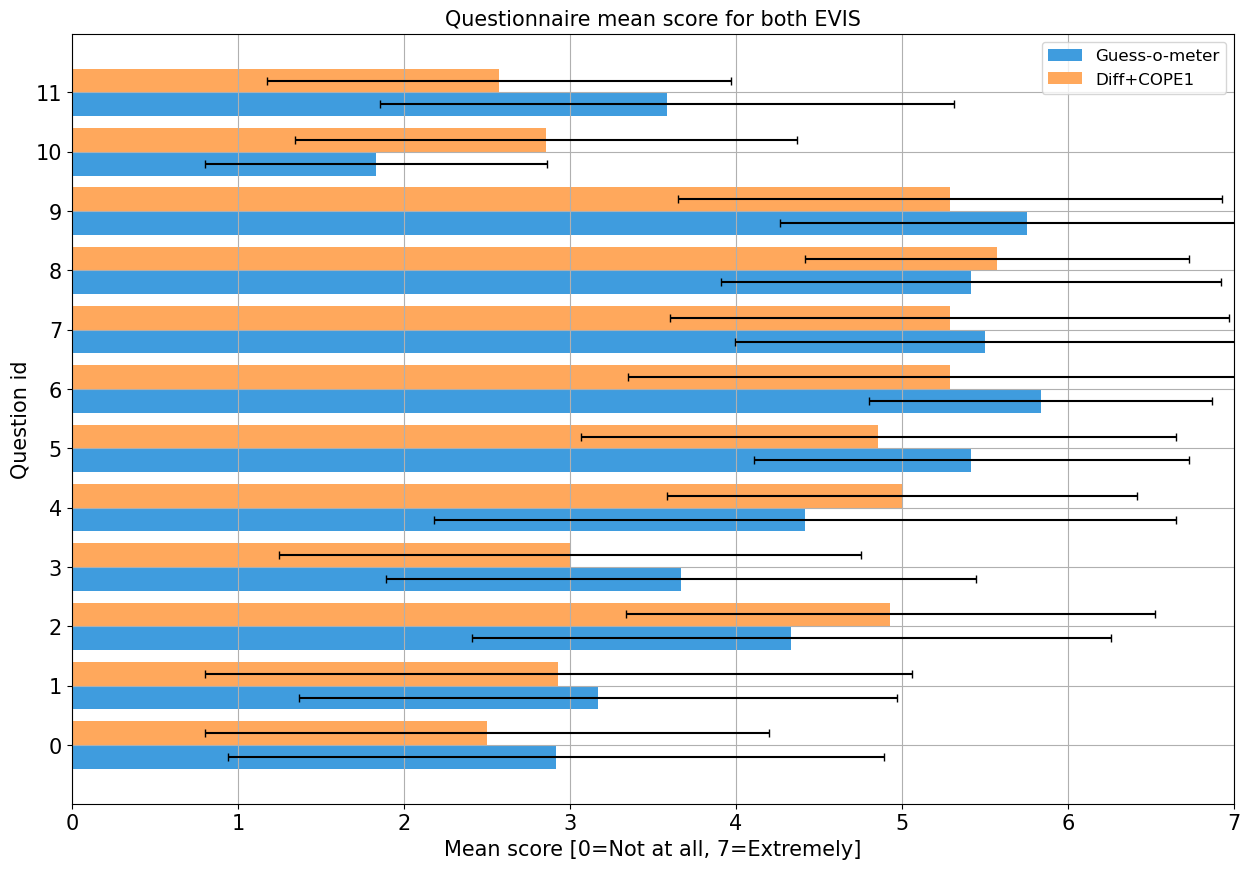

In [19]:
# Plot the data in a bar chart diagram

fig, ax = plt.subplots(figsize=(15,10))

labels = questions_guess.index
guess_mean = questions_guess["mean"].values
guess_std = questions_guess["std"].values

labels = questions_guess.index
diff_mean = questions_diff["mean"].values
diff_std = questions_diff["std"].values

x = np.arange(len(labels))
width = 0.4
capsize = 3

ax.barh( x - width/2, guess_mean, width, xerr=guess_std, capsize=capsize, label="Guess-o-meter", color=color_guess)
ax.barh( x + width/2, diff_mean, width, xerr=diff_std , capsize=capsize, label="Diff+COPE1", color=color_diff)

ax.set_xlabel("Mean score [0=Not at all, 7=Extremely]")
ax.set_ylabel("Question id")
ax.set_title("Questionnaire mean score for both EVIS")

ax.set_xlim(0,7)
ax.grid(True)
ax.legend()
ax.set_yticks(x);
#ax.set_yticklabels(labels);

In [18]:
fig.savefig("../figures-local/questionnaire_mean_score_rotated.png", dpi=300, bbox_inches = 'tight')